In [68]:
!pip install bmi_nwis
!pip install weibull

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataretrieval.nwis as nwis
import weibull

output_pkl_file = 'streamflow_data_'

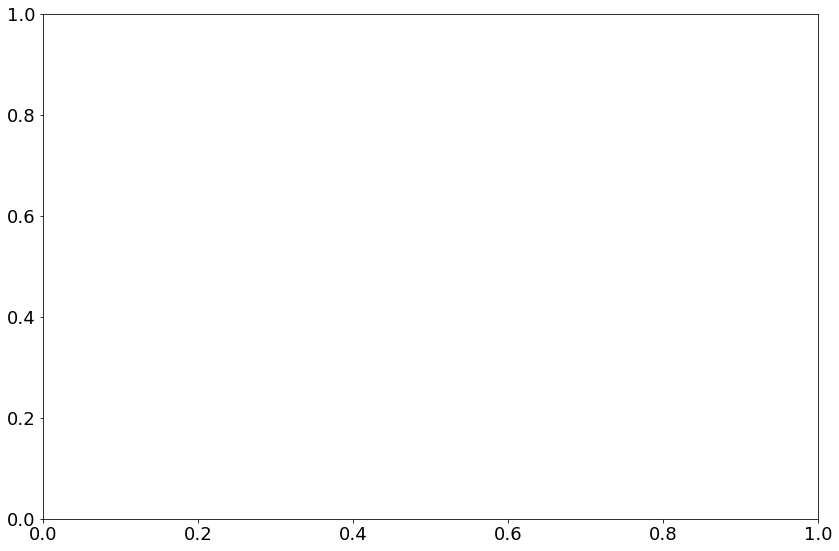

In [3]:
#site_id = '13185000' # Boise River at Twin Springs
site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
#site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start_date = '1970-10-01'
my_end_date = '2020-09-30'

In [4]:
df_flow = nwis.get_record(sites=site_id, service='dv', 
                          start=my_start_date, end=my_end_date)
df_flow

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,254.0,A
1970-10-02 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,254.0,A
1970-10-03 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,254.0,A
1970-10-04 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,245.0,A
1970-10-05 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,245.0,A
...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,117.0,A
2020-09-27 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,121.0,A
2020-09-28 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,121.0,A


Text(0, 0.5, 'Discharge (ft${}^3$/s)')

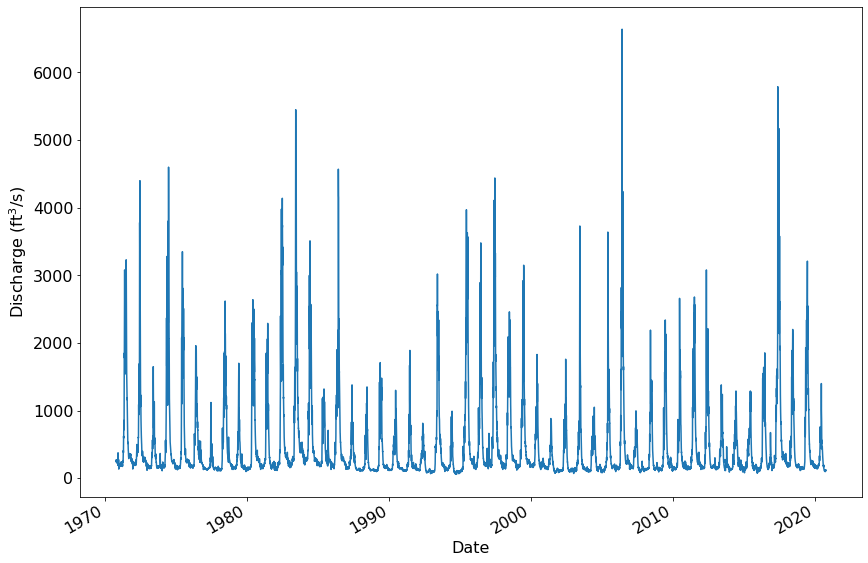

In [5]:
plt.rcParams.update({'font.size': 16})

ax1 = df_flow['00060_Mean'].plot(x='datetime', figsize=(14,10))

ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (ft${}^3$/s)')

In [6]:
# Get the dates and convert them to a Pandas datetime object
dates = df_flow.index
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = df_flow['00060_Mean'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = df_flow.index.year.values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? 
df.to_pickle(output_pkl_file+site_id+'.pkl')

# Show the dataframe we've created
df

,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01 00:00:00+00:00,1970-10-01 00:00:00+00:00,1971,254.0,7.192741
1970-10-02 00:00:00+00:00,1970-10-02 00:00:00+00:00,1971,254.0,7.192741
1970-10-03 00:00:00+00:00,1970-10-03 00:00:00+00:00,1971,254.0,7.192741
1970-10-04 00:00:00+00:00,1970-10-04 00:00:00+00:00,1971,245.0,6.937881
1970-10-05 00:00:00+00:00,1970-10-05 00:00:00+00:00,1971,245.0,6.937881
...,...,...,...,...
2020-09-26 00:00:00+00:00,2020-09-26 00:00:00+00:00,2020,117.0,3.313192
2020-09-27 00:00:00+00:00,2020-09-27 00:00:00+00:00,2020,121.0,3.426463
2020-09-28 00:00:00+00:00,2020-09-28 00:00:00+00:00,2020,121.0,3.426463


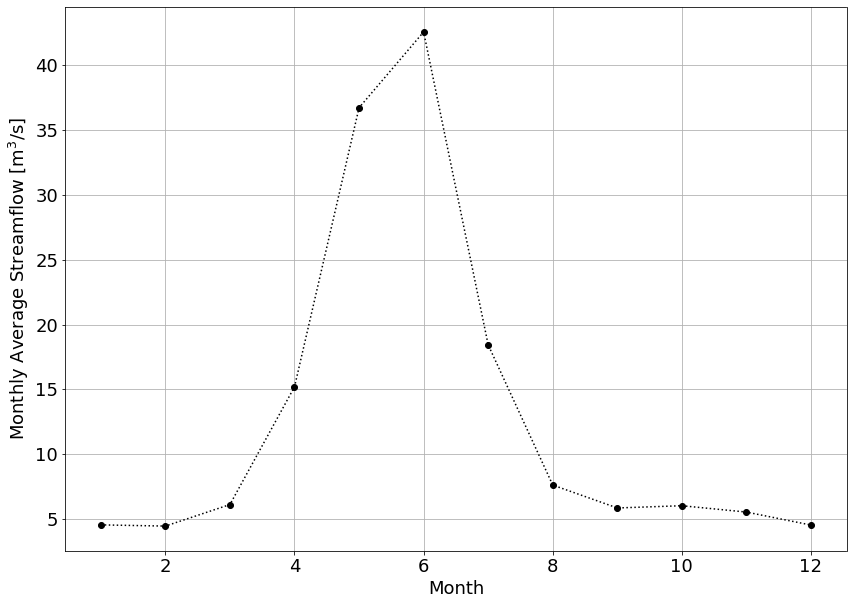

In [7]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

In [60]:
#located the max values by going through this

df_flow['00060_Mean'].groupby(df_flow.index.year).max()

datetime
1970     376.0
1971    3230.0
1972    4400.0
1973    1650.0
1974    4600.0
1975    3350.0
1976    1960.0
1977    1120.0
1978    2620.0
1979    1700.0
1980    2640.0
1981    2290.0
1982    4140.0
1983    5450.0
1984    3510.0
1985    1320.0
1986    4570.0
1987    1380.0
1988    1350.0
1989    1710.0
1990    1300.0
1991    1890.0
1992     813.0
1993    3020.0
1994     991.0
1995    3970.0
1996    3480.0
1997    4440.0
1998    2460.0
1999    3150.0
2000    1830.0
2001     883.0
2002    1760.0
2003    3730.0
2004    1050.0
2005    3640.0
2006    6640.0
2007     996.0
2008    2190.0
2009    2340.0
2010    2660.0
2011    2680.0
2012    3080.0
2013    1380.0
2014    1290.0
2015    1290.0
2016    1850.0
2017    5790.0
2018    2200.0
2019    3210.0
2020    1400.0
Name: 00060_Mean, dtype: float64

In [23]:
#Unable to find/create Q_ams command, so I went by hand to find the five highest and lowest
#Lowest in order:1970 (360), 1992 (813), 2001 (883), 1994 (991), 2007 (996)
#Highest in order:2006 (6640), 2017 (5790), 1983 (5450),1974 (4600), 1986 (4570), 

In [63]:
df_flow['00060_Mean'].groupby(df_flow.index.year).max().values


df.sort_values(by, axis=0, ascending=False, inplace=False, kind=’quicksort’, na_position=’last’)

SyntaxError: invalid character '’' (U+2019) (1834241635.py, line 4)

In [73]:
#Attempted to use pandas to so df.Dataframe for the 10 values and was unsuccessful
#Unable to proceed since weibull had issues.


NameError: name 'array' is not defined